# Module 12: Data Visualization

CSCI 1360: Foundations for Informatics and Analytics

## Overview and Objectives

Data visualization is one of, if not **the**, most important method of communicating data science results. It's analogous to writing: if you can't visualize your results, you'll be hard-pressed to convince anyone else of them. Plus, visualizing is key to exploring data and developing an intuition for it. By the end of this lecture, you should be able to

 - Define and describe some types of plots and what kinds of data they're used to visualize
 - Use the basic functionality of `matplotlib` to generate figures
 - Customize the look and feel of figures to suit particular formats
 - Generate histograms and plots for exploring 1D and 2D data


## Part 1: Introduction to `matplotlib`

The Matplotlib package as we know it was originally conceived and designed by John Hunter in 2002, originally built as an IPython plugin to enable Matlab-style plotting.

IPython's creator, Fernando Perez, was at the time finishing his PhD and didn't have time to fully vet John's patch. So John took his fledgling plotting library and ran with it, releasing Matplotlib version 0.1 in 2003 and setting the stage for what would be the most flexible and cross-platform Python plotting library to date.

Matplotlib can run on a wide variety of operating systems and make use of a wide variety of graphical backends. Hence, despite some developers complaining that it can feel bloated and clunky, it easily maintains the largest active user base and team of developers, ensuring it will remain relevant in some sense for quite some time yet.

You've seen snippets of matplotlib in action in several assignments and lectures, but we haven't really formalized it yet. Like NumPy, matplotlib follows some use conventions.

### First time installation

Run `pip install -U matplotlib` in the terminal.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

By far, we'll use the `plt` object from the second import the most; that contains the main plotting library.

### Plotting in a script

Let's say you're coding a standalone Python application, contained in a file `myapp.py`. You'll need to explicitly tell matplotlib to generate a figure and display it, via the `show()` command.

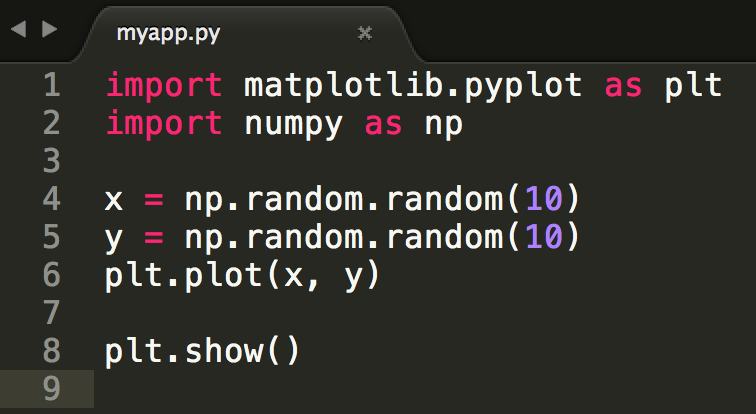

Then you can run the code from the command line:

<pre>$ python myapp.py</pre>

**Beware**: `plt.show()` (line 8 in the script) does a lot of things under-the-hood, including interacting with your operating system's graphical backend.

Matplotlib hides all these details from you, but as a consequence you should be careful to only use `plt.show()` *once* per Python session.

Multiple uses of `plt.show()` can lead to unpredictable behavior that depends entirely on what backend is in use, so try your best to avoid it.

### Plotting in a shell (e.g., IPython)

Remember back to our first lecture, when you learned how to fire up a Python prompt on the terminal? You can plot in that shell just as you can in a script!

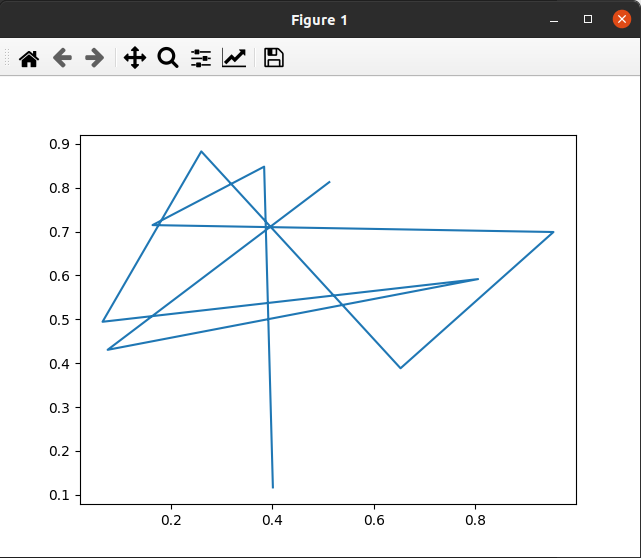

In addition, you can enter "matplotlib mode" by using the `%matplotlib` magic command in the IPython shell. You'll notice in the above screenshot that the prompt is hovering below line [6], but no line [7] has emerged. That's because the shell is currently *not* in matplotlib mode, so it will wait forever until you close the figure on the right.

By contrast, in matplotlib mode, you'll immediately get the next line of the prompt *while* the figure is still open. You can then edit the properties of the figure dynamically to update the plot. To force an update, you can use the command `plt.draw()`.

### Plotting in a notebook (e.g., Jupyter)

This is probably the mode you're most familiar with: plotting in a notebook, such as the one you're viewing right now.

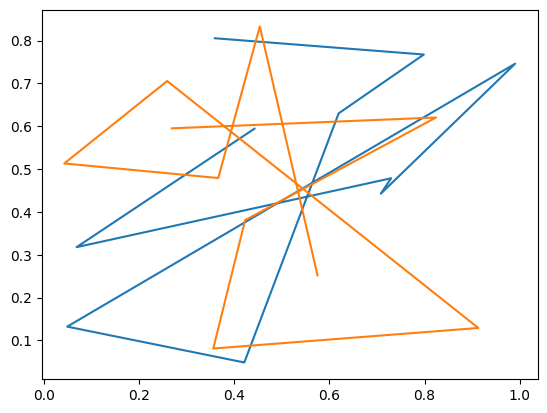

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Finally, some code!
x = np.random.random(10)
y = np.random.random(10)
plt.plot(x, y)


x1 = np.random.random(10)
y1 = np.random.random(10)
plt.plot(x1, y1)


**Note that you do NOT need to use `plt.show()`!** When using "inline" mode, matplotlib will automatically render whatever the "active" figure is as soon as you issue some kind of plotting command.

### Saving plots to files

Sometimes you'll want to save the plots you're making to files for use later, perhaps as part of a presentation to demonstrate to your bosses what you've accomplished.

In this case, you once again won't use the `plt.show()` command, but instead substitute in the `plt.savefig()` command.

An image file will be created (in this case, `fig.png`) on the filesystem with the plot.

Matplotlib is designed to operate nicely with lots of different output formats; PNG was just the example used here.

The output format is inferred from the filename used in `savefig()`. You can see all the other formats matplotlib supports with the command

In [29]:
fig = plt.figure()
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format',
 'webp': 'WebP Image Format'}

<Figure size 640x480 with 0 Axes>

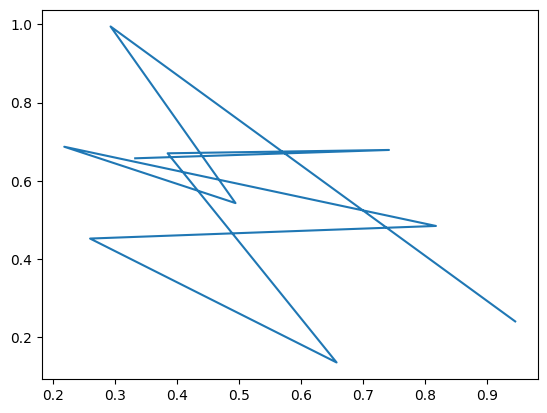

In [15]:
plt.plot(x, y)
plt.savefig('plot.png',)

## Part 2: Basics of plotting

Ok, let's dive in with some plotting examples and how-tos!

The most basic kind of plot you can make is the *line plot*. This kind of plot uses `(x, y)` coordinate pairs and implicitly draws lines between them. Here's an example:

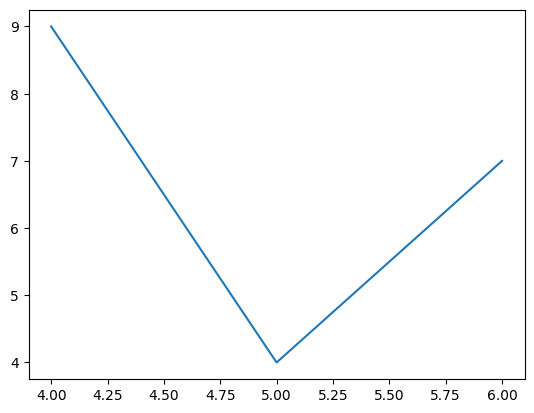

In [31]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.array([4, 5, 6])  # X coordinates for 3 data points
y = np.array([9, 4, 7])  # Y coordinates for the 3 data points
plt.plot(x, y)

Matplotlib sees we've created points at (4, 9), (5, 4), and (6, 7), and it connects each of these in turn with a line, producing the above plot. It also automatically scales the x and y axes of the plot so all the data fit visibly inside.

An important side note: matplotlib is *stateful*, which means it has some memory of what commands you've issued. So if you want to, say, include multiple different plots on the same figure, all you need to do is issue additional plotting commands.

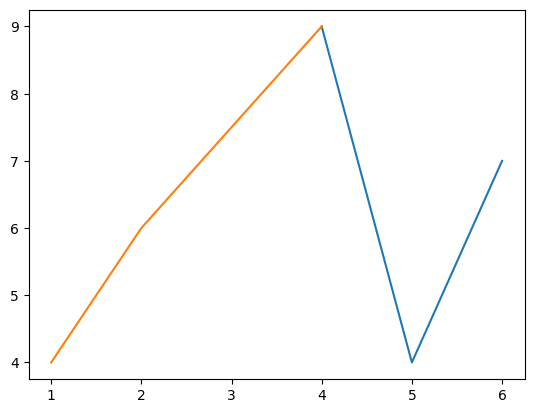

In [32]:
x1 = np.array([4, 5, 6])
y1 = np.array([9, 4, 7])
plt.plot(x1, y1) # First call to plot.
x2 = np.array([1, 2, 4])
y2 = np.array([4, 6, 9])
plt.plot(x2, y2) # Second call, but matplotlib "remembers" the first one.

They'll even be plotted in different colors. How nice!

Line plots are nice, but let's say I really want a *scatter plot* of my data; there's no real concept of a line, but instead I have disparate data points in 2D space that I want to visualize. There's a function for that!

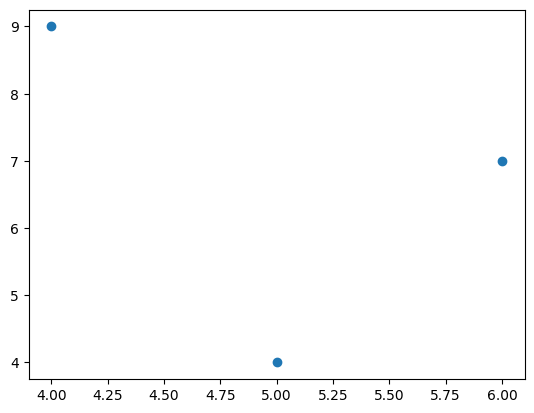

In [33]:
x = np.array([4, 5, 6])
y = np.array([9, 4, 7])
plt.scatter(x, y)

We use the `plt.scatter()` function, which operates pretty much the same way as `plt.plot()`, except it puts dots in for each data point *without* drawing lines between them.

Another very useful plot, especially in scientific circles, is the *errorbar plot*. This is a lot like the line plot, except each data point comes with an errorbar to quantify uncertainty or variance present in each datum.

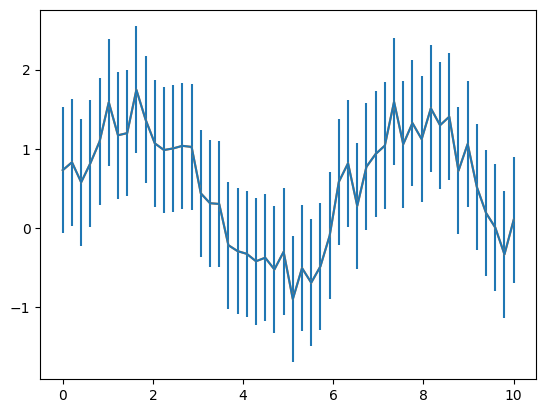

In [34]:
# This is a great function that splits the interval [0, 10] 
# into 50 evenly-spaced segments
x = np.linspace(0, 10, 50)

dy = 0.8  # The error rate.
y = np.sin(x) + dy * np.random.random(50)   # Adds a little bit of noise.

plt.errorbar(x, y, yerr = dy)
plt.plot(x, y)

You use the `yerr` argument of the function `plt.errorbar()` in order to specify what your error rate in the y-direction is. There's also an `xerr` optional argument, if your error is actually in the x-direction.

In [35]:
# Let's see what is in x and y for the above plot
print(x)
print(y)

[ 0.          0.20408163  0.40816327  0.6122449   0.81632653  1.02040816
  1.2244898   1.42857143  1.63265306  1.83673469  2.04081633  2.24489796
  2.44897959  2.65306122  2.85714286  3.06122449  3.26530612  3.46938776
  3.67346939  3.87755102  4.08163265  4.28571429  4.48979592  4.69387755
  4.89795918  5.10204082  5.30612245  5.51020408  5.71428571  5.91836735
  6.12244898  6.32653061  6.53061224  6.73469388  6.93877551  7.14285714
  7.34693878  7.55102041  7.75510204  7.95918367  8.16326531  8.36734694
  8.57142857  8.7755102   8.97959184  9.18367347  9.3877551   9.59183673
  9.79591837 10.        ]
[ 0.72904427  0.82888266  0.5755552   0.81668923  1.09067138  1.58708615
  1.16974447  1.19696368  1.74470515  1.36813874  1.06796678  0.98336246
  1.00381841  1.0362619   1.02270897  0.43645118  0.31117906  0.30188252
 -0.21949924 -0.29429273 -0.32871513 -0.42205525 -0.37752923 -0.52591213
 -0.30262573 -0.90136875 -0.50825181 -0.69313799 -0.48629697 -0.09996764
  0.58080023  0.81593047 

What about that statistics lecture we had not so long ago? We have a bunch of numbers and would like to visualize how they are distributed to see if we can make any inferences and predictions about that. Histograms to the rescue!

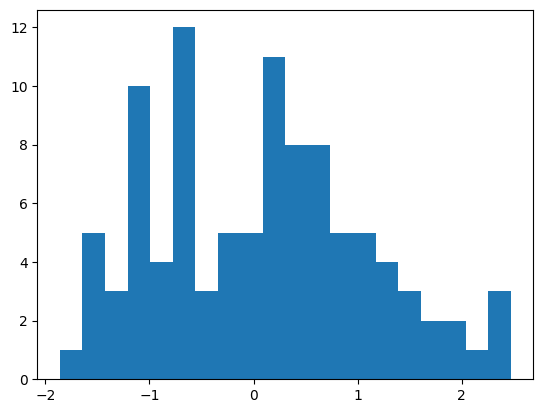

In [36]:
x = np.random.normal(size = 100)  # This is 100 numbers, drawn from a normal distribution
_ = plt.hist(x, bins = 20)

`plt.hist()` has only 1 required argument: a list of numbers. However, the optional `bins` argument is very useful, as it dictates how many bins you want to use to divide up the data in the required argument.

Picking the number of bins for histograms is an art unto itself that usually requires a lot of trial-and-error, hence the importance of having a good visualization setup!

Too many bins and every bar in the histogram will have a count of 1...

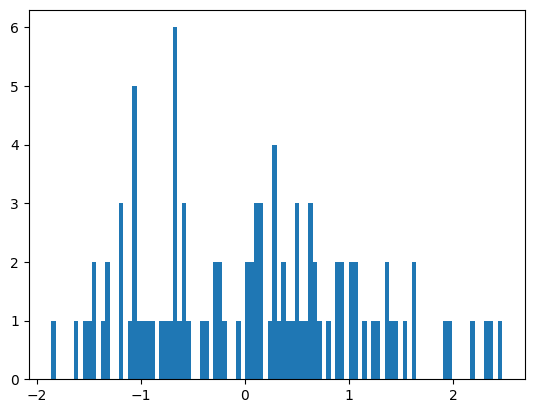

In [37]:
_ = plt.hist(x, bins = 100)  # 100 bins for 100 data points? Bad idea

...while too few bins will see all your data grouped into a single bar!

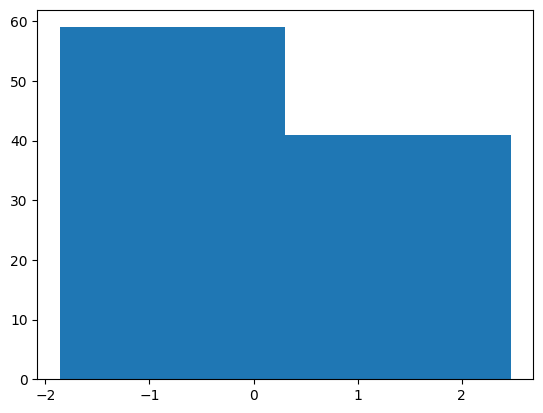

In [38]:
_ = plt.hist(x, bins = 2)  # Way too few bins

The last type of plot we'll discuss here isn't really a "plot" in the sense as the previous ones have been, but it is no less important: showing images!

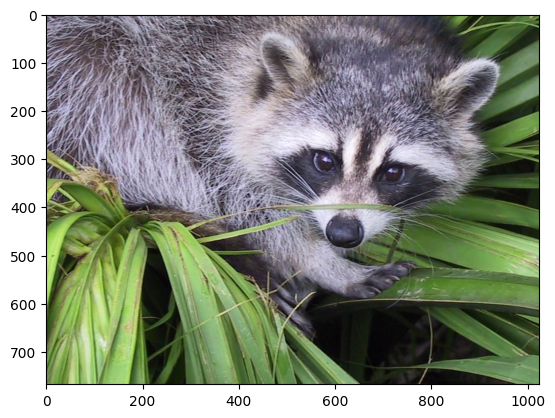

In [39]:
import scipy.datasets
face = scipy.datasets.face()
plt.imshow(face)

The `plt.imshow()` method takes as input a *matrix* and renders it as an image. 

It doesn't even have be a "true" image. Often you want to look at a matrix that you're building, just to get a "feel" for the structure of it. `imshow()` is great for this as well.

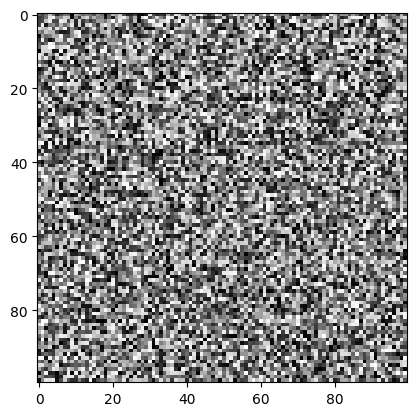

In [40]:
matrix = np.random.random((100, 100))  # A 100x100 matrix of random numbers.
plt.imshow(matrix, cmap = "gray")

We built a random matrix `matrix`, and as you can see it looks exactly like that: in fact, a lot like TV static (coincidence?...). The `cmap = "gray"` optional argument specifies the "colormap", of which [matplotlib has quite a few](https://matplotlib.org/examples/color/colormaps_reference.html); this uses the "gray" colormap.

In [41]:
# let's see what is in matrix
print(matrix.shape)

(100, 100)


## Part 3: Customizing the look and feel

You may be thinking at this point: this is all cool, but my inner graphic designer cringed at how a few of these plots looked. Is there any way to make them look, well, "nicer"?

There are, in fact, a couple things we can do to spiff things up a little, starting with how we can annotate the plots in various ways.

### Axis labels and plot titles

You can add text along the axes and the top of the plot to give a little extra information about what, exactly, your plot is visualizing. For this you use the `plt.xlabel()`, `plt.ylabel()`, and `plt.title()` functions.

Text(0.5, 1.0, 'Plot of sin(x)')

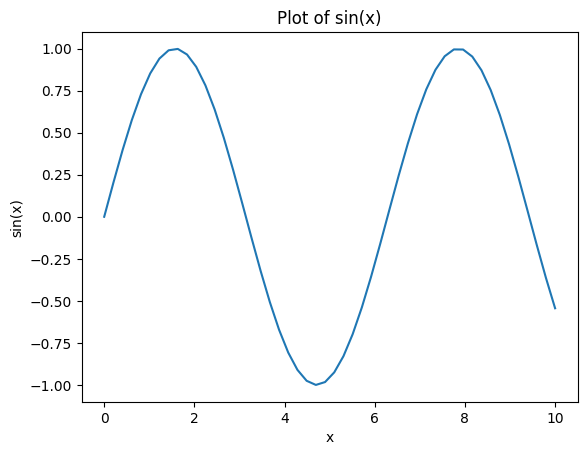

In [5]:
x = np.linspace(0, 10, 50)  # 50 evenly-spaced numbers from 0 to 10
y = np.sin(x)  # Compute the sine of each of these numbers.
plt.plot(x, y)
plt.xlabel("x")  # This goes on the x-axis.
plt.ylabel("sin(x)")  # This goes on the y-axis.
plt.title("Plot of sin(x)")  # This goes at the top, as the plot title.

### Legends

Going back to the idea of plotting multiple datasets on a single figure, it'd be nice to label them in addition to using colors to distinguish them. Luckily, we have legends we can use, but it takes a coordinated effort to use them effectively. Pay close attention:

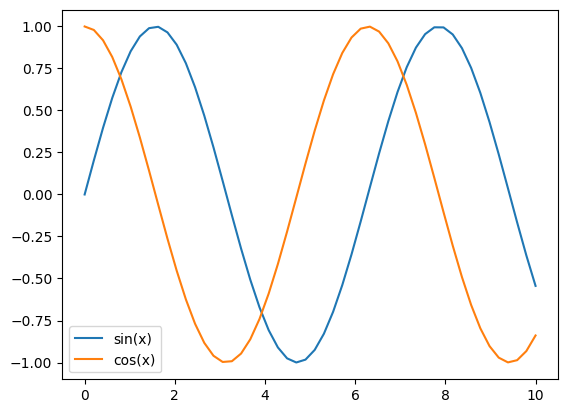

In [8]:
x = np.linspace(0, 10, 50)  # Evenly-spaced numbers from 0 to 10
y1 = np.sin(x)  # Compute the sine of each of these numbers.
y2 = np.cos(x)  # Compute the cosine of each number.

plt.plot(x, y1, label = "sin(x)")
plt.plot(x, y2, label = "cos(x)")
plt.legend()

First, you'll notice that the `plt.plot()` call changed a little with the inclusion of an optional argument: `label`. This string is the label that will show up in the legend.

Second, you'll also see a call to `plt.legend()`. This instructs matplotlib to show the legend on the plot. The `loc` argument specifies the location; "0" tells matplotlib to "put the legend in the best possible spot, respecting where the graphics tend to be." This is usually the best option, but if you want to override this behavior and specify a particular location, the numbers 1-9 refer to different specific areas of the plot.

### Axis limits

This will *really* come in handy when you need to make multiple plots that span different datasets, but which you want to compare directly. We've seen how matplotlib scales the axes so the data you're plotting are visible, but if you're plotting the data in entirely separate figures, matplotlib may scale the figures differently. If you need set explicit axis limits:

(-3.0, 3.0)

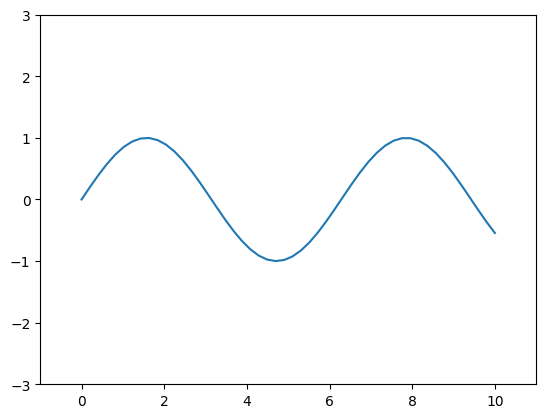

In [10]:
x = np.linspace(0, 10, 50)  # Evenly-spaced numbers from 0 to 10
y = np.sin(x)  # Compute the sine of each of these numbers.

plt.plot(x, y)
plt.xlim([-1, 11])  # Scale the x-axis from -1 to 11
plt.ylim([-3, 3])  # Scale the y-axis from -3 to 3

This can potentially help center your visualizations, too.

### Colors, markers, and colorbars

Matplotlib has a default progression of colors it uses in plots--you may have noticed the first data you plot is always blue, followed by yellow. You're welcome to stick with this, or you can manually override the colors scheme in any plot using the optional argument `c` (for color).

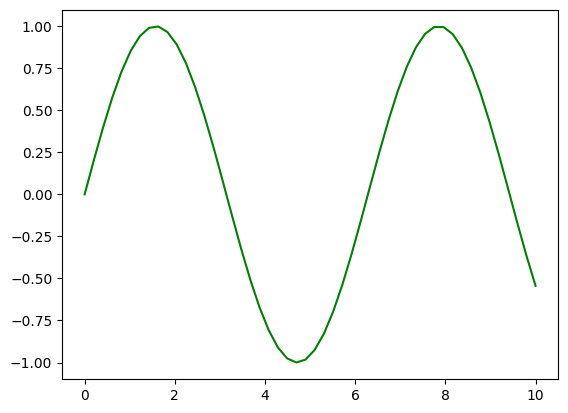

In [12]:
x = np.linspace(0, 10, 50)  # Evenly-spaced numbers from 0 to 10
y = np.sin(x)  # Compute the sine of each of these numbers.

plt.plot(x, y, c = "green")

If you're making scatter plots, it can be especially useful to specify the *type* of marker in addition to the color you want to use. This can really help differentiate multiple scatter plots that are combined on one figure.

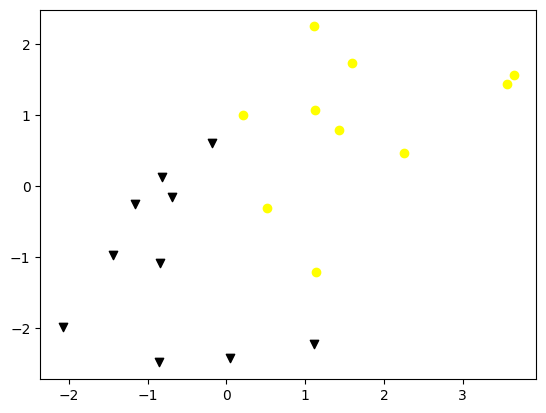

In [46]:
X1 = np.random.normal(loc = [-1, -1], size = (10, 2))
X2 = np.random.normal(loc = [1, 1], size = (10, 2))

plt.scatter(X1[:, 0], X1[:, 1], c = "black", marker = "v")
plt.scatter(X2[:, 0], X2[:, 1], c = "yellow", marker = "o")

Finally, when you're rendering images, and especially matrices, it can help to have a colorbar that shows the scale of colors you have in your image plot.

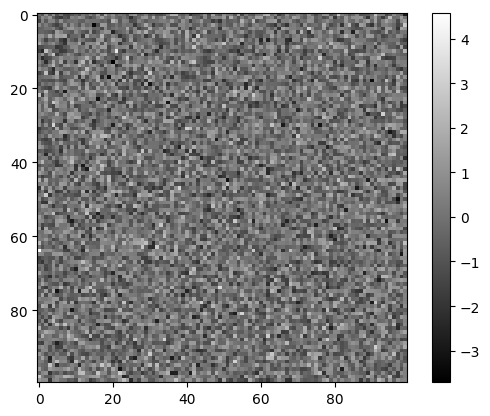

In [47]:
matrix = np.random.normal(size = (100, 100))
plt.imshow(matrix, cmap = "gray")
plt.colorbar()  # The only command you need to specify a colorbar.

The matrix is clearly still random, but the colorbar tells us the values in the picture range from around -3.5 or so to +4, giving us an idea of what's in our data.

## Part 4: Exploring Data

One particularly important skill that all data scientists must have is the ability to **explore your data.**

If I told you right this second to go build me a Facebook friend recommendation system, you would (rightfully) look at me like I'd gone crazy, not the least of which is because I *hadn't given you any of the data you would be using to actually make recommendations to users.*

You have to **understand your data** before you can ever begin to start thinking about how to put it to use.

 - You can't write a friend recommendation system without ever seeing a single data point.
 - You can't build a facial recognition plug-in for Instagram without first seeing some example images.
 - You can't write a speech transcription application for iPhone voicemails without accessing some recorded messages.

What kinds of patterns exist in the data that you can take advantage of? What unexpected properties do the data have that you'll have to account for? What assumptions can you make? What assumptions *can't* you make?

These are all points that require you to explore your data--doing some basic poking and prodding to get a feel for your data.

### One dimension

This is about as simple as it gets: your data consist of a list of numbers. We saw in previous lectures that you can compute statistics (mean, median, variance, etc) on these numbers. You can also visualize them using histograms. We'll reiterate that point here, using a particular example.

In [14]:
import numpy as np
np.random.seed(3908544)

# Generate two random datasets.
data1 = np.random.normal(loc = 0.2, scale = 58, size = 1000)
data2 = 200 * np.random.random(1000) - 100

In [15]:
# What are their means and variances?
print("Dataset 1 average: {:.2f} (+/- {:.2f})".format(data1.mean(), data1.std()))
print("Dataset 2 average: {:.2f} (+/- {:.2f})".format(data2.mean(), data2.std()))

Dataset 1 average: 1.80 (+/- 57.68)
Dataset 2 average: 1.88 (+/- 57.92)


Both datasets contain 1000 random numbers. Both datasets have very nearly the same mean and same standard deviation.

But the two datasets *look* very different!

(0.0, 80.0)

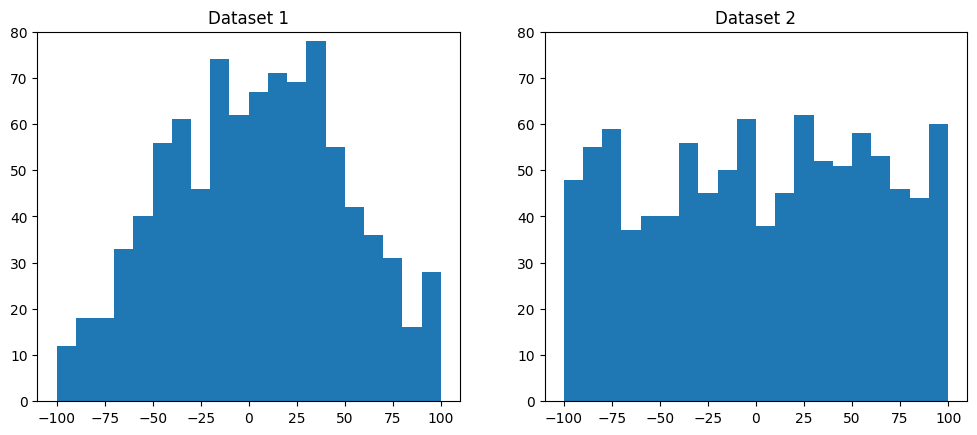

In [10]:
plt.figure().set_figwidth(12)
plt.subplot(121)
plt.title("Dataset 1")
_ = plt.hist(data1, bins = 20, range = (-100, 100))
plt.ylim([0, 80])
plt.subplot(122)
plt.title("Dataset 2")
_ = plt.hist(data2, bins = 20, range = (-100, 100))
plt.ylim([0, 80])

**Behold: the importance of viewing your data!** Dataset 1 is drawn from a Gaussian / Normal distribution (our good friend, the bell curve), while Dataset 2 is uniform--meaning the data are spread evenly between two values (-100 and 100, in this case), rather than clustered around the middle like the bell curve.

### Two dimensions

Two (and even three) dimensions? **Scatter plots** are your friend. Consider the following fake datasets.

In [11]:
np.random.seed(8493248)

X = np.random.normal(size = 1000)
Y1 = (X + np.random.normal(size = 1000) / 2)
Y2 = (-X + np.random.normal(size = 1000) / 2)

If you plotted `Y1` and `Y2` using the histograms from the previous strategy, you'd get two datasets that looked pretty much identical.

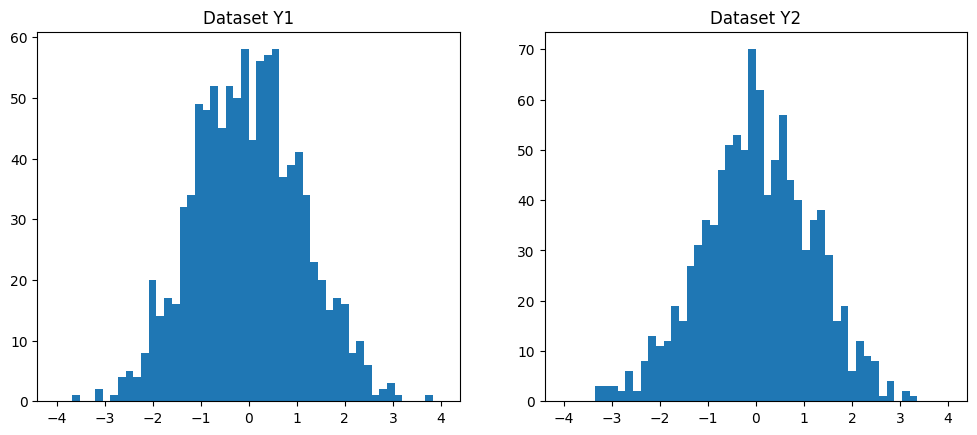

In [12]:
plt.figure().set_figwidth(12)
plt.subplot(121)
plt.title("Dataset Y1")
_ = plt.hist(Y1, bins = 50, range = (-4, 4))
plt.subplot(122)
plt.title("Dataset Y2")
_ = plt.hist(Y2, bins = 50, range = (-4, 4))

Maybe *slightly* different shapes, but qualitatively (and statistically) identical.

But what if we visualized the data in 2D using a scatter plot?

Text(0.5, 1.0, 'Joint Distribution')

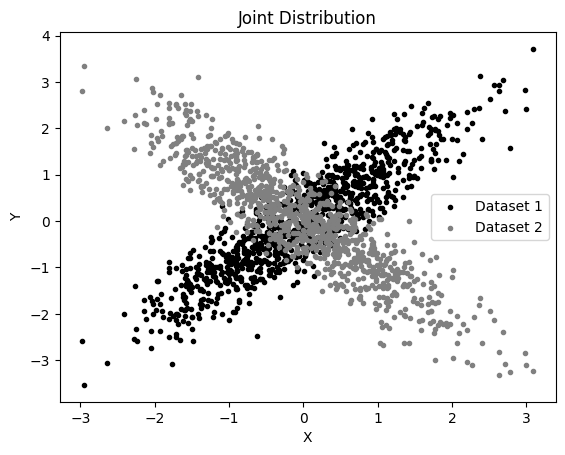

In [13]:
plt.scatter(X, Y1, marker = ".", color = "black", label = "Dataset 1")
plt.scatter(X, Y2, marker = ".", color = "gray", label = "Dataset 2")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc = 0)
plt.title("Joint Distribution")

DIFFERENT, again! But it required a different visualization / summarization technique to discover.

These two datasets are *anticorrelated* (as one goes up, the other goes down). To see what this means, we can derive the correlation coefficients for the two datasets independently:

In [54]:
print(np.corrcoef(X, Y1)[0, 1]) # Dataset 1
print(np.corrcoef(X, Y2)[0, 1]) # Dataset 2

0.8968162147352859
-0.8951775902073922


"Correlation" means as we change one variable (X), another variable changes by a similar amount (Y). Positive correlation means as we increase one variable, the other increases; negative correlation means as we increase one variable, the other *decreases*.

Anticorrelation, then, is the presence of both positive and negative correlation, which is what we see in this dataset: one has a correlation coefficient of 0.9 (1.0 is perfect positive correlation), while the other is -0.9 (-1.0 is perfect negative correlation).

**This is something we'd only know from either visualizing the data or examining how the data are correlated.**

Simpler strategies--means, medians, modes, standard deviations, and histograms--are all very useful data exploration strategies, and you should definitely keep them handy!

But they have their limits, as we've already seen. Also exploring correlation, and using scatter plots, in combination with the simpler strategies, will help you get a firmer handle on the behavior of the data.

### More than two dimensions

If you have 3D data, matplotlib is capable of displaying that. But beyond three dimensions, it can get tricky. A good starting point is to make a *correlation matrix*, where the $i^{th}$ row and $j^{th}$ column of the matrix is the correlation coefficient between the $i^{th}$ and $j^{th}$ dimensions of the data.

Another strategy is to create 2D scatter plots of every pairwise combinations of dimensions. For every $i^{th}$ and $j^{th}$ dimension in the data, create a 2D scatter plot like we did in the last slide. This way, you can visualize each dimensions relative to each other dimension and easily spot any correlations.

These are pretty advanced techniques that we won't explicitly cover here (though possibly incidentally in later lectures). The upshot here is to **find a way to visualize your data**.

### Beyond summary statistics

There's an awesome article about data visualization that demonstrates precisely why summary statistics, on their own, can be viciously misleading.

https://flowingdata.com/2017/07/07/small-summary-stats/

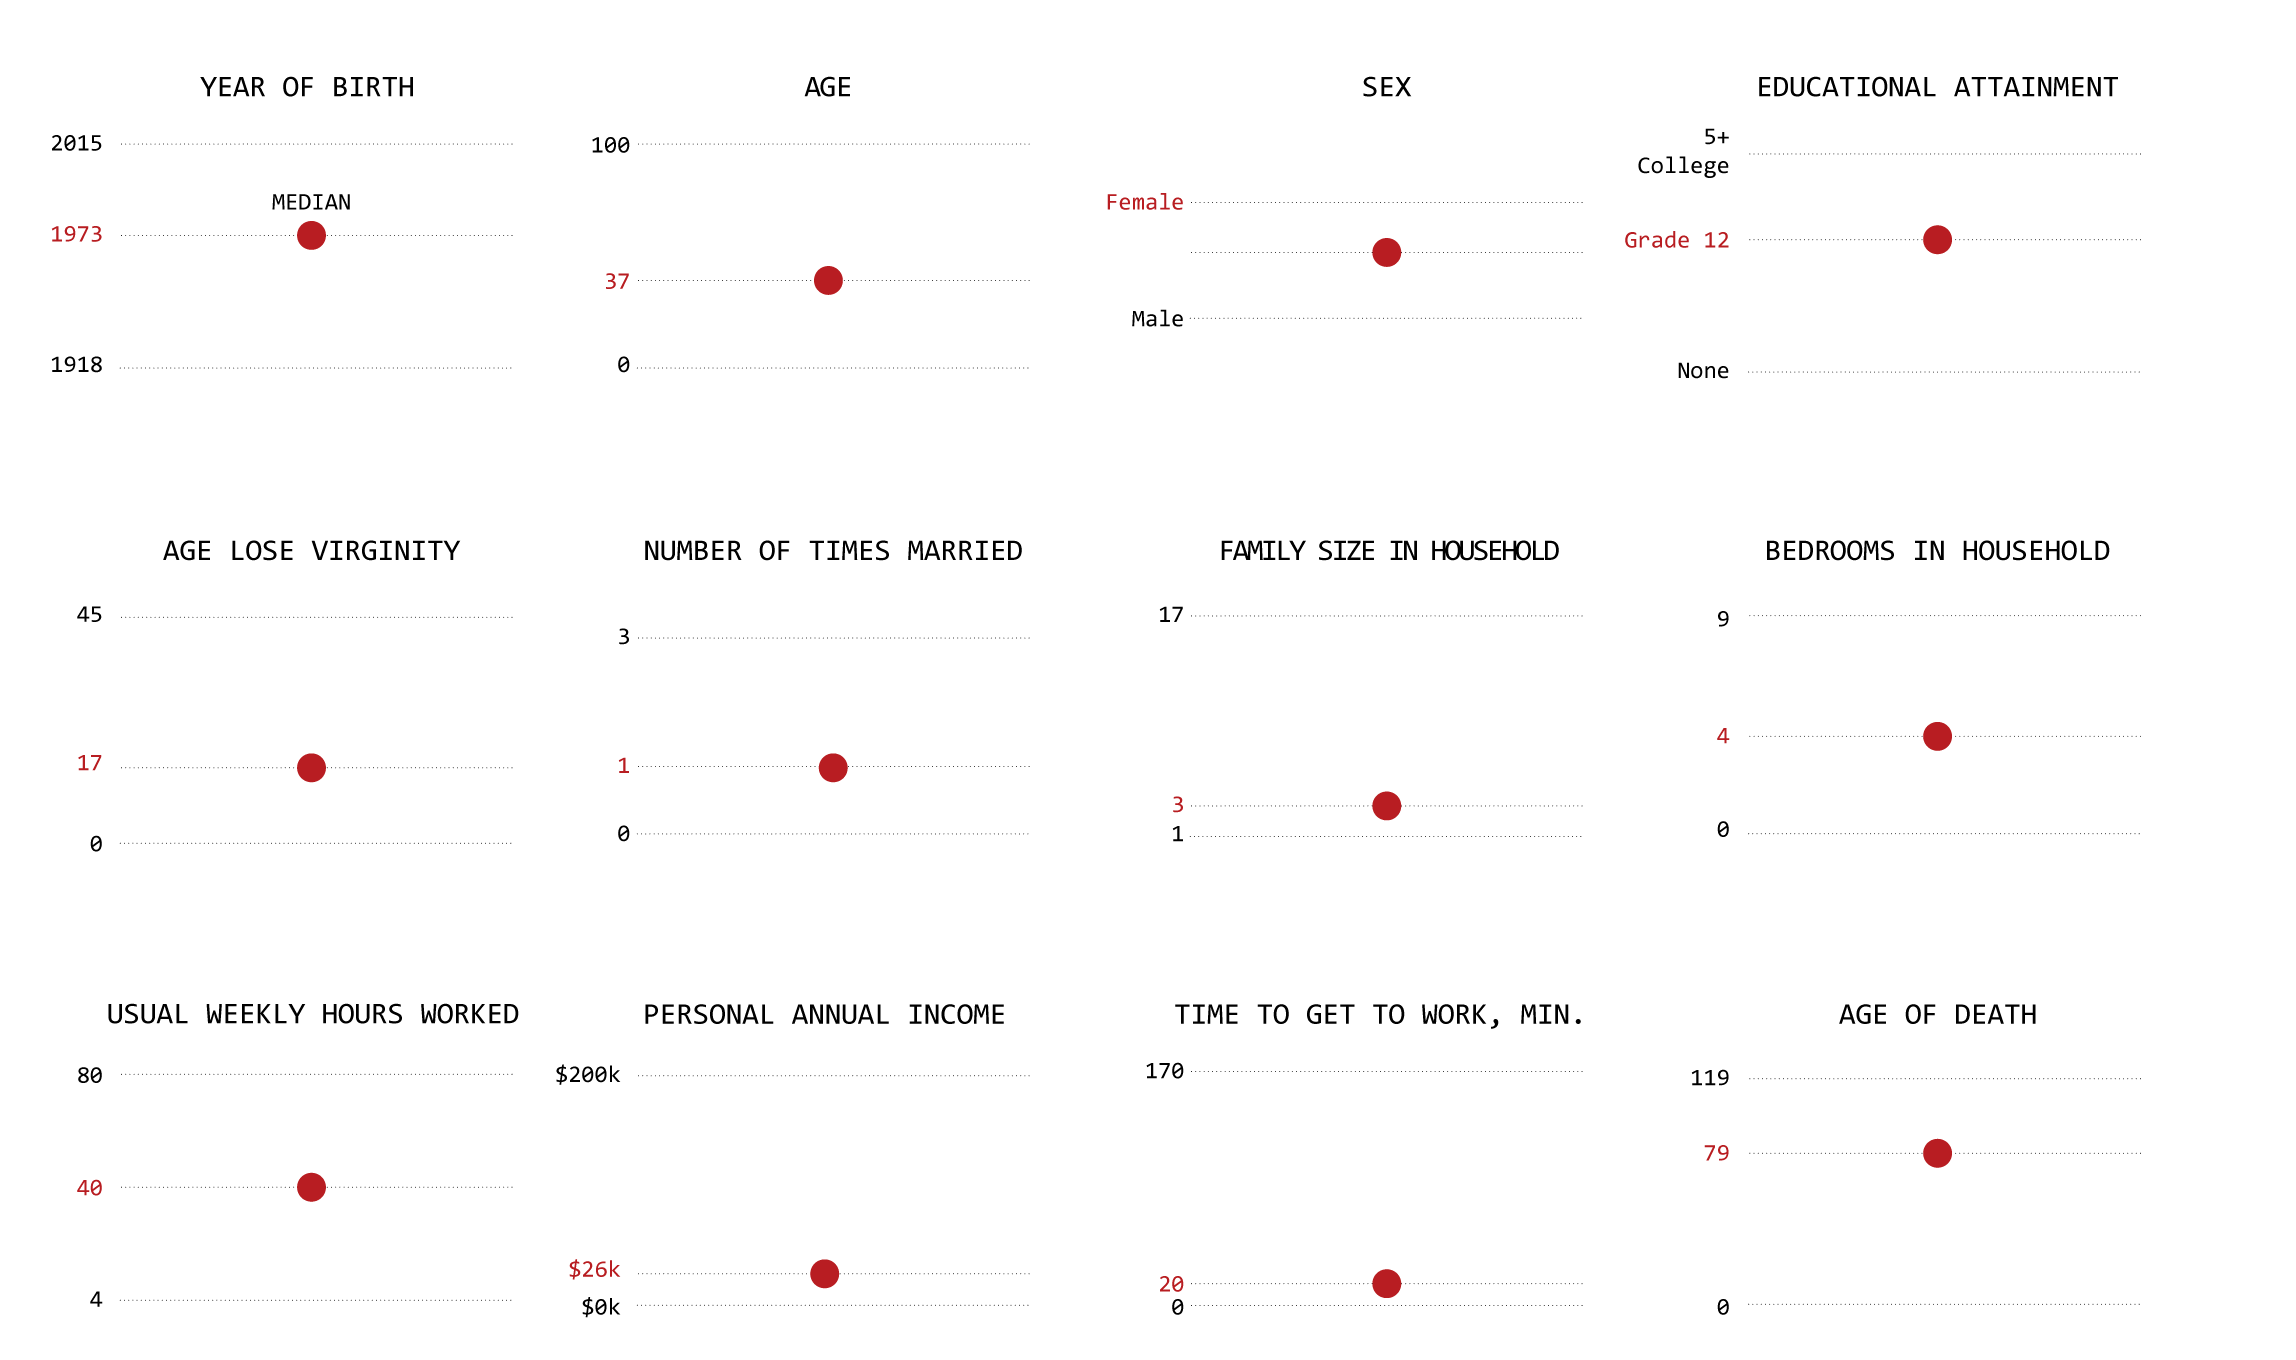

I particularly like the "Age" and "Family Size in Household" plots, because the averages shown (the single dots) aren't even the widest parts of the full plot.

 - The average age shows as 37, but a plurality of people seem to be about +/- 10 years of that number.

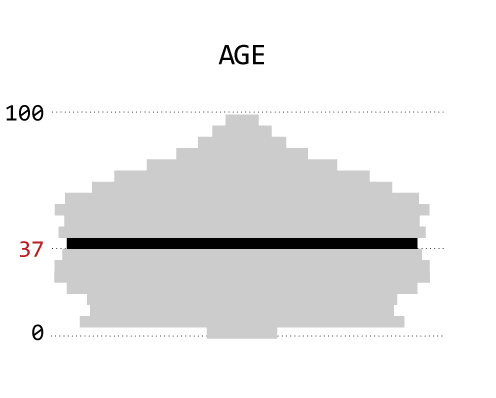

 - The average size of a household is 3, but the plurality looks to be somewhere between 1 and 2.

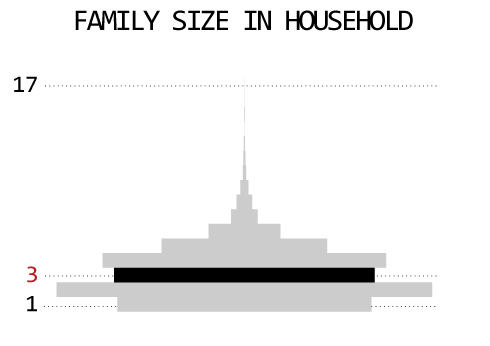

Moral of the story: **summary statistics are great and absolutely essential, but they almost always require further visualization of the details!**

## Review Questions

Some questions to discuss and consider:

1: You may have noticed much of the plotting that was done in this lecture relied on *vectorized* plotting, where entire NumPy arrays were fed to matplotlib in one call. The data don't have to be arrays, though; they can be single points fed through a loop. Can you speculate as to why it might be better to use vectorized statements when plotting?

2: There are a lots of other types of plots supported by matplotlib we didn't even touch on: 3D plots, contour plots, wireframe plots, bar plots, heatmaps, subplots, in-plot text annotations, and plotting on maps. Pick one of these and provide an example of where it could be used, especially if you've used it in your own work.

3: Name some useful visualizations for time series data, and what that would correspond to in matplotlib.

4: Name some useful visualizations for a 3D normal random variable. How to use it for 4D data?

## Additional Resources

 1. VanderPlas, Jake. *Python Data Science Handbook*. 2015. ISBN-13: 978-1491912058
 2. "The Python Visualization Landscape": https://www.youtube.com/watch?v=FytuB8nFHPQ (Jake VanderPlas, *PyCon 2017*)
 3. http://www.unofficialgoogledatascience.com/2016/10/practical-advice-for-analysis-of-large.html
